Stephanie Leroux
2020-04-22

### Time evolution of the E-std of e1, e2 spatially averaged over the MEDWEST domain
* from the 3 20-members experiments i have so far:
    - GSL14: Stochastic STD of 1%, exp starting in Feb 2010
    - GSL15: Stochastic STD of 5%, exp starting in Feb 2010
    - GSL16: Stochastic STD of 1%, exp starting in Aug 2010
* The e-std was computed on JZ via ```cdfenstats```

---
## Modules

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean

# Adekunle's PowerSPec module: https://github.com/adeajayi-kunle/PowerSpec
#import powerspec as ps
#import Plot_PowerSpec as pp

# custom tools
import lib_medwest60 as slx

%matplotlib inline 

---
## Read ESTATS files 
(computed from cdftool cdfenstat on JZ)

In [2]:
# READ

diri='/mnt/meom/workdir/lerouste/MEDWEST60/'
dircoord ='/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-I/'

estd_GSL14 = xr.open_mfdataset(diri+'MEDWEST60-GSL14-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL14-ens01_1h_*_gridT-2D_*.nc')['stdev_e1t']
estd_GSL15 = xr.open_mfdataset(diri+'MEDWEST60-GSL15-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL15-ens01_1h_*_gridT-2D_*.nc')['stdev_e1t']
estd_GSL16 = xr.open_mfdataset(diri+'MEDWEST60-GSL16-S/ens01/1h/gridT-2D/'+'ESTATS_MEDWEST60-GSL16-ens01_1h_*_gridT-2D_*.nc')['stdev_e1t']

#estd3m_GSL14 = xr.open_mfdataset(diri+'MEDWEST60-GSL14-S/ens01/1h/gridT-2D/'+'ESTATS_3MB_MEDWEST60-GSL14-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']
#estd3m_GSL13 = xr.open_mfdataset(diri+'MEDWEST60-GSL13-S/ens01/1h/gridT-2D/'+'ESTATS_3MB_MEDWEST60-GSL13-ens01_1h_*_gridT-2D_*.nc')['stdev_sossheig']

nav_lon   = xr.open_dataset(dircoord+'MEDWEST60_coordinates_v3.nc4')['nav_lon']
nav_lat   = xr.open_dataset(dircoord+'MEDWEST60_coordinates_v3.nc4')['nav_lat']
maskmap   = xr.open_dataset(dircoord+'MEDWEST60_mask.nc4')['tmask'][0,0,:,:]
e1tref    = xr.open_dataset(dircoord+'MEDWEST60_mesh_hgr.nc4')['e1t'][0,:,:]


## Spatial average (quick and diry, just using an averaged et1ref...)

In [3]:
DOM_estd_GSL14 = slx.spavedom(estd_GSL14.where(maskmap>0))
DOM_estd_GSL15 = slx.spavedom(estd_GSL15.where(maskmap>0))
DOM_estd_GSL16 = slx.spavedom(estd_GSL16.where(maskmap>0))

# PLOT

In [ ]:
test14 = DOM_estd_GSL14/e1tref
test15 = DOM_estd_GSL15/e1tref
test16 = DOM_estd_GSL16/e1tref

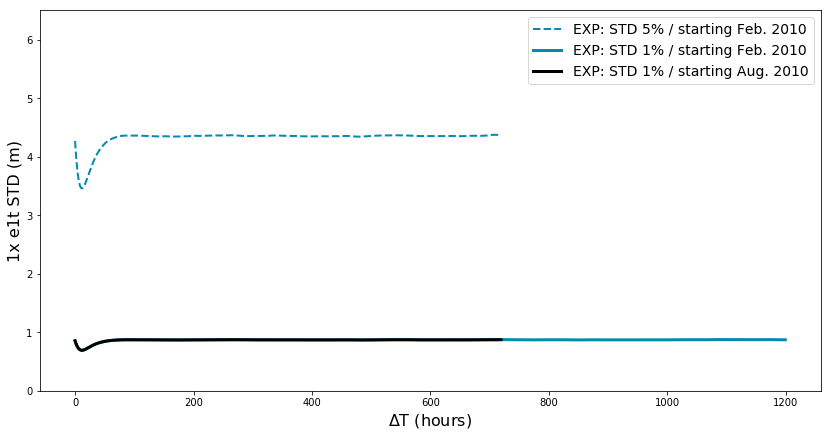

In [4]:
latexvarname = "e1t"
varname = "e1t"
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/'

fac=100./1450.
faclabel='1'


fig1 = plt.figure(figsize=([14,7]),facecolor='white')

plt.plot(DOM_estd_GSL15*fac,color='#0489B1',linestyle='--',linewidth=2,label='EXP: STD 5% / starting Feb. 2010')
plt.plot(DOM_estd_GSL14*fac,color='#0489B1',linestyle='-',linewidth=3,label='EXP: STD 1% / starting Feb. 2010')
plt.plot(DOM_estd_GSL16*fac,color='k', linestyle='-',linewidth=3,label='EXP: STD 1% / starting Aug. 2010')

#plt.plot(DOM_estd3m_GSL14.isel(time_counter=slice(0,470))*fac,color='#0489B1',linestyle='-',linewidth=2,label='(3MB) EXP: STD 1% / start Feb. 2010')
#plt.plot(DOM_estd3m_GSL13.isel(time_counter=slice(0,470))*fac,color='r',linestyle=':',linewidth=3,label='GSL13')
#plt.plot(STDensdom_b*fac,color='g',linestyle=':',linewidth=5,label='GSL13py')

plt.xlabel('$\Delta$T (hours)',size=16)

ysize=16
if ((fac!=1)&(fac!=(1e3))):
    plt.ylabel(faclabel+'x '+latexvarname+' STD (m)',size=ysize)
elif fac==(1e3):   
    plt.ylabel(latexvarname+' STD (mm)',size=ysize)     
else:
    plt.ylabel(latexvarname+' %',size=ysize)
 
plt.ylim(0,6.5)
#plt.xlim(0,200)

plt.legend(fontsize=14)    
plt.show()
slx.saveplt(fig1,diro,'ts_STD_'+varname)


* not exactly the set values, but keep in mind that there is a spatial filter, plua the % computation her was done quick and dirty (et1_ref averaged)